###### The cell below loads the visual style of the notebook when run.

In [1]:
from IPython.core.display import HTML
css_file = '../../styles/styles.css'
HTML(open(css_file, "r").read())

# SciPy - Scientific algorithms for Python

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span>Learning Objectives</h2>
</div>
</section>

> * Use SciPy for:
     - Integration
     - Interpolation
     - Fourier analysis and period finding
     - Special Functions
> * Where to find help on scipy

So far we've seen how to read and write data to text files, how to plot data and how to do some basic analysis with NumPy. The third party library ```SciPy``` provides a wide array of tools for the scientist. 

The purpose of this notebook is to give you a guided tour of some of the things you can do with a small amount of Python, supported by the power of the SciPy library. It can also act as a *reference*, for you to look back on if you want to remember how to do something. Try and understand the code examples, but don't worry massively if there are one or two things you don't quite follow.

### Scipy Overview

Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))

As well as the links above, a good place to get started with SciPy topics is the [tutorial](http://docs.scipy.org/doc/scipy/reference/tutorial/index.html), which has sections on each topic. 

We will come back to many of these topics later in the course. Specifically there will be lessons that focus on fitting models to data and solving differential equations. In this practical, I want to briefly look at  **some** of the functionality within SciPy to tackle some common tasks we might encounter as astronomers. The idea is to get an idea of the kinds of things that SciPy can do, rather than exhaustively explore a single area.

---

## Integration

Suppose we want to evaluate 

$$
\int_a^b f(x)\, dx.
$$

If $f(x)$ can be integrated analytically all is fine. What if there is no analytical solution? Or if we don't know the function $f(x)$ at all, but just have a series of measures of it's value? Numerical evaluation of an integral is called *numerical quadrature*, and scipy provides a series of functions for this - the ```quad```, ```dblquad``` and ```tplquad``` for single, double and triple integrals respectively. 

In [2]:
from scipy.integrate import quad, dblquad, tplquad

Thes functions have a large number of optional arguments which alter the behaviour of the function (try ```quad?``` for example). 

Basic usage works like this:

In [3]:
# define a simple function for the integrand - in this case y = x
def f(x):
    return x

In [4]:
x_lower = 2 # lower limit of integral
x_upper = 4 # upper limit

value, abserr = quad(f, x_lower, x_upper) # integrate numerically!

print ("The integral value is {}, with absolute error {}".format(value,abserr))

The integral value is 6.0, with absolute error 6.661338147750939e-14


Thus, numerical integration of simple functions is pretty easy.

One optional argument is worth considering. The ```args``` keyword argument allows us to handle integrand functions that take more than one argument. For example, the function below calculates $x$ raised to some, user-defined, power.

In [5]:
# integrand function with two arguments
def f(x, power):
    return x**power

Let's say we want to use this to integrate $x^2$. We want the second argument to the function to be 2. We would integrate it using ```quad``` like so:

In [9]:
x_lower = 3
x_upper = 6

#args is a list of the extra arguments to integrand function
value, abserr = quad(f, x_lower, x_upper, args=(2,))  

print ("The integral value is {}, with absolute error {}".format(value, abserr))

The integral value is 63.0, with absolute error 6.994405055138486e-13


In [0]:
def new_function(x, a, b, c):
    return a + b*x + c*x**2

args = (1, 2, 3)
value, abserr = quad(new_f)

### Integrating under data

What if we don't know the underlying functional form, but just have a series of samples of the data? As an example, below we have some measurements of the radiation dose rate a spacecraft is receiving at different times. Suppose want to work out the total dose?

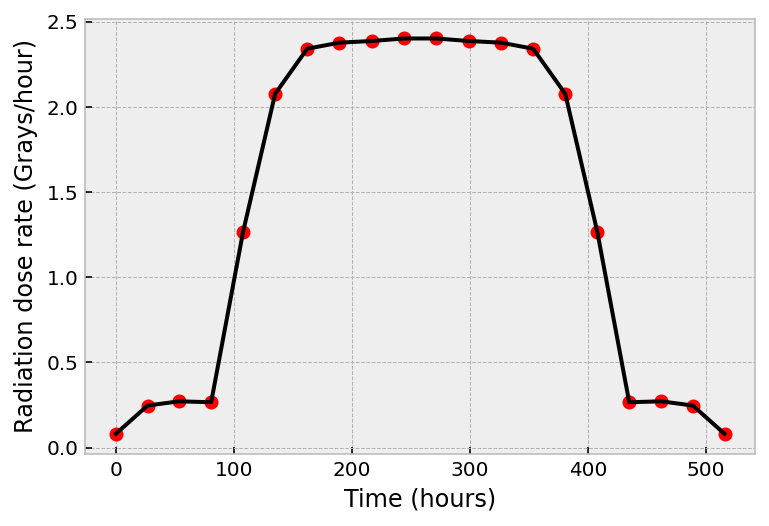

In [7]:
import numpy as np
# refer to session 2 if you don't understand the next 3 lines!
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

# t = time of measurements, in hours
# G = measured radiation at spacecraft, in Grays/hour
data = np.loadtxt('../../data/Session3/radiation_dose.txt')
t = data[:,0] # first column
G = data[:,1] # second column

fig,ax = plt.subplots()
ax.plot(t, G, 'ro') # plot with red circles
ax.plot(t, G, 'k-') # and a black line
ax.grid(True)
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Radiation dose rate (Grays/hour)')
plt.show()


The total radiation received is the area under this curve. In the past you've probably found this by hand, by using the [trapezium rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). Actually, it would not be too hard to write a function to integrate this, but why bother, when SciPy has this coded up for you, along with the (usually) more accurate [Simpsons rule](https://en.wikipedia.org/wiki/Simpson%27s_rule).

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Add it up</h2>
</div>
</section>

> Make a crude estimate by-eye of the area under the curve. Now, look at the online [documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) for SciPy's version of Simpson's rule. Use Simpson's rule to estimate the area under the curve, and thus the total radiation dose...

In [8]:
from scipy.integrate import simps

total_dose = 0.0
# YOUR CODE HERE
print ('Total dose = {:.1f} Grays'.format(total_dose))

Total dose = 0.0 Grays


<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>To infinity and beyond</h2>
</div>
</section>

> ```quad``` can accept infinite limits to the integral, by passing ```np.inf``` as the limit. 
>
> Calculate the integral
>
$$ E_n(x) = \int_1^\infty \frac{e^{-xt}}{t^n}\, dt
$$
> 
> For $n=1$ and $x=0.5$

> *Hint: I have provided the integrand function already - you'll need to use the ```args``` keyword to make sure $n$ and $x$ have the correct values*




In [9]:
 def integrand(t, n, x):
    return np.exp(-x*t) / t**n
# YOUR CODE HERE

---

## Interpolation

Interpolation is very easy in scipy. The ```interp1d``` function takes arrays of x and y data and returns a **function** that can be called for an arbitrary value of x, and returns the interpolated y value. Consider our spacecraft above:

In [10]:
from scipy.interpolate import interp1d

# get a function that does linear interpolation
# arguments are 'x' and 'y' for the curve we wish to 
# interpolate
linear_interpolation = interp1d(t,G)

# call it to find dose at t=120
val = linear_interpolation(120.0)

print("Dose on spacecraft at 120 hours = {} Grays/hr".format(val))

# the value to calculate at can be an array, or list of values
# the function will return the interpolated value at each position
#in the list
print(linear_interpolation([120,130]))

Dose on spacecraft at 120 hours = 1.6313783351616908 Grays/hr
[1.63137834 1.9301992 ]


The ```interp1d``` function takes a ```kind``` argument that allows you to set the type of interpolation:

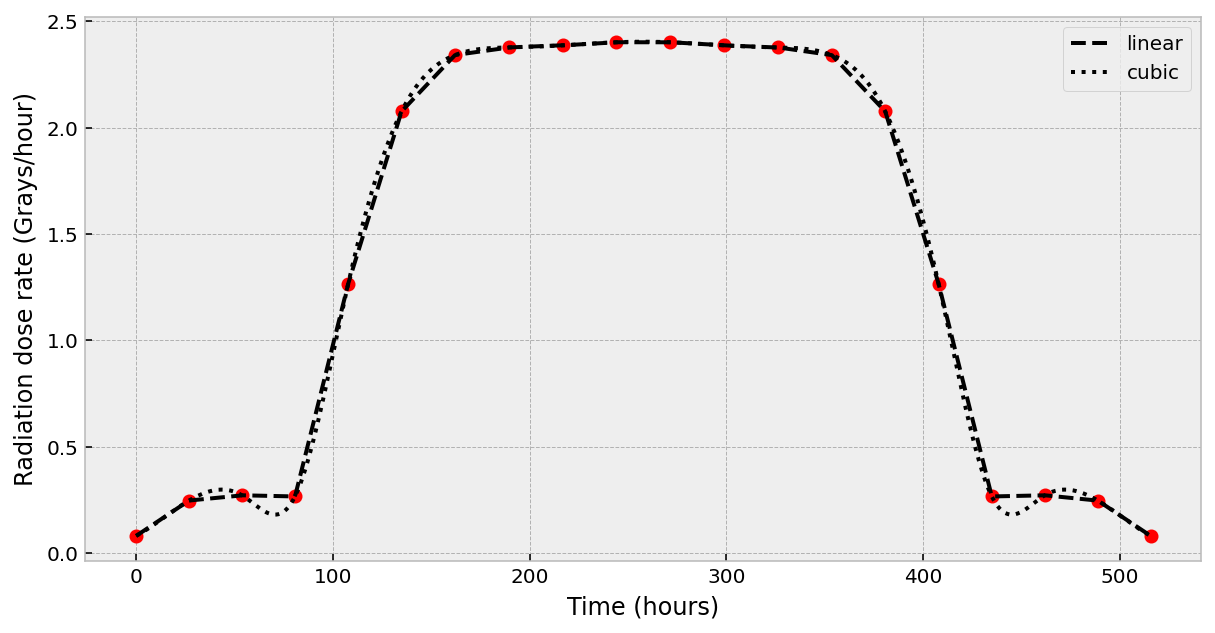

In [11]:
# make a fine grid of 1000 values
finely_spaced_t_values = np.linspace(t.min(), t.max(), 1000) 

# get a function that does linear interpolation
linear_interpolation = interp1d(t,G)
# call it
G_lin_interp = linear_interpolation(finely_spaced_t_values)

cubic_interpolation = interp1d(t,G,kind='cubic')
G_cub_interp = cubic_interpolation(finely_spaced_t_values)

# plot
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(t, G, 'ro') # plot with red circles
ax.plot(finely_spaced_t_values, G_lin_interp, 'k--', label='linear') # dashed line
ax.plot(finely_spaced_t_values, G_cub_interp, 'k:', label='cubic') # dotted line


# format plot
ax.grid(True)
ax.axis('tight')
ax.legend()
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Radiation dose rate (Grays/hour)')
plt.show()

## Fourier transform and period finding

Fourier transforms are one of the most widespread tools in physics and astronomy. SciPy provides access to the efficient and well tested fourier transform library [FFTPACK](http://www.netlib.org/fftpack/).

To use the ```fftpack``` module, import it with

In [12]:
from scipy import fftpack

In astronomy, one important use of Fourier transforms is to find periodic signals in data, such as the period of a pulsating or rotating star. This works because the Fourier transform of an infinitely long sine wave is a [delta function](https://en.wikipedia.org/wiki/Dirac_delta_function) at the period of the wave. Let's look at an example. First, we'll load and plot the data:

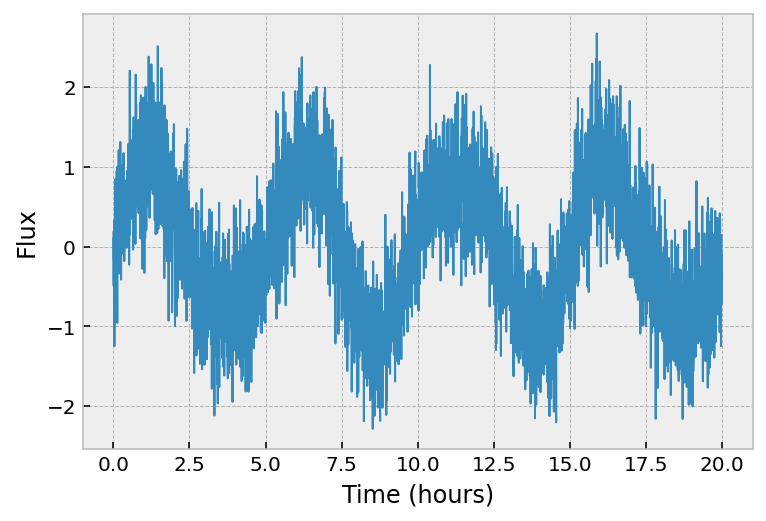

In [13]:
time, flux = np.loadtxt('../../data/Session3/lightcurve.txt',unpack=True)
fig,ax = plt.subplots()
ax.plot(time,flux,lw=1) # thinner linewidth
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Flux')
plt.show()

We can see that it's a periodically variable star, and the period looks to be around 5 hours. Let's calculate a fourier transform to find the period:

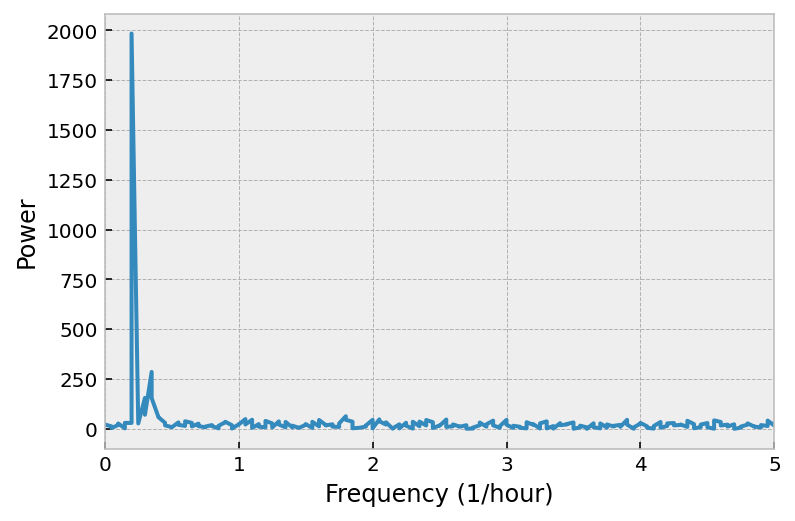

In [14]:
# calculate the fast fourier transform 
# gives an array of fourier transform values at each frequency
F = fftpack.rfft(flux)
# these values can be positive or negative, we only care about the size
F = np.abs(F)

#calculate the corresponding frequencies
N = len(time) # number of times
dt = time[1]-time[0] # time step between times
freq = fftpack.rfftfreq(N,dt)

#plot the fourier transform
fig,ax = plt.subplots()
ax.plot(freq,F)
ax.set_xlabel('Frequency (1/hour)')
ax.set_ylabel('Power')
ax.set_xlim(0,5)
plt.show()

As expected, the Fourier transform has a sharp peak around a frequency $f = 0.2$ hour$^{-1}$, which corresponds to a period $P = 1/f = 5$ hours. However, note the small second peak - this is telling us there is a second period present in the data at $\sim3$ hours, which we would have missed looking at the data by-eye!

### The Lomb-Scargle periodogram

The Fourier transform only works on *regularly* spaced data. Normally in astronomy we don't have regularly sampled data - for example if we were measuring the brightness of a star every hour for a month there would be lots of gaps in the data when the Sun was up!

The Lomb-Scargle periodogram is a classic method for finding periodicity in irregularly-sampled data. It is used a *lot* in astronomy. The Astropy library has an implementation of the Lomb-Scargle periodogram. You can find a full tutorial on it's use [here](http://docs.astropy.org/en/stable/stats/lombscargle.html)

---

## Special Functions

We have only skimmed the surface of scipy in this lecture. Later we'll see examples of using scipy to solve differential equations, and fit models to data. Before we finish, I want to mention the *special function* module within scipy. The reason for doing this will become apparent when we reach the homework!

Special functions are mathematical functions which have established names because they are important to mathematics or physics. Many special functions are the solutions to differential equations or integrals.

To demonstrate the special functions I will use the Bessel functions. Bessel functions are the functions $y(x)$ which solve Bessel's equation

$$
x^2 \frac{d^2y}{dx^2} + x \frac{dy}{dx} + (x^2 - n^2) y = 0.
$$

The solutions to this equation are called Bessel functions of the first kind. The solution for a given $n$ is denoted $J_n(x)$. No simple expressions for them exist, but they crop up frequently in astronomy - from studies of planetary dynamics, to calculating the rotation curves of galaxies. Therefore it is useful to have computer algorithms for calculating their value at a given value of $x$. Naturally, scipy contains these algorithms!

We use them in scipy as follows:

In [15]:
from scipy.special import jn, jn_zeros
#
# The scipy.special module includes a large number of Bessel-functions
# We only use jn, which are the Bessel functions of the first kind 
# We also include the function jn_zeros that gives the locations of 
# the zeroes of the function jn
#

value = jn(0, 1.5)
print ("J_0(1.5) = {:.2f}".format( value ))

J_0(1.5) = 0.51


Let's use SciPy to plot the Bessel functions from $n=0...3$:

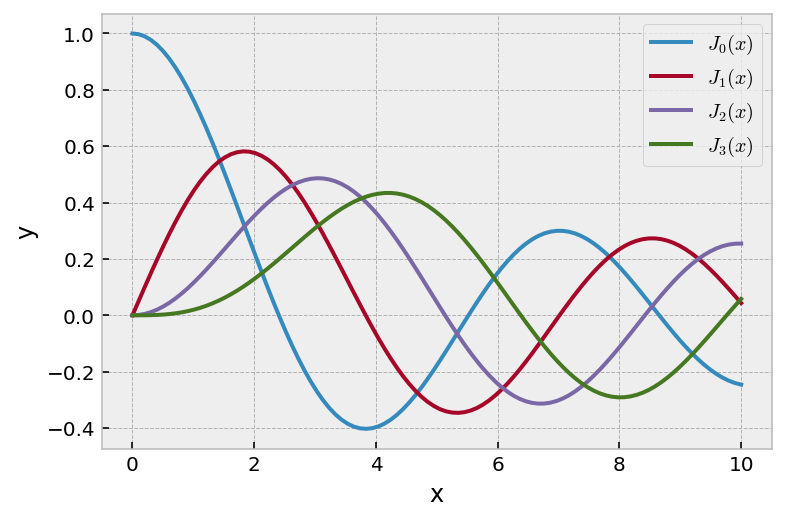

In [16]:
x = np.linspace(0,10,100)
fig,ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r'$J_{}(x)$'.format(n))
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

And we can use the ```jn_zeros``` function to find the values of $x$ for which the Bessel functions are 0:

In [17]:
# zeros of Bessel functions
n = 1 # 1st order Bessel Function
m = 3 # number of zeros to compute
print( jn_zeros(n,m) )

[ 3.83170597  7.01558667 10.17346814]


---------
<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h1>Homework #3</h1>
<h2><span class="fa fa-pencil"></span>Diffraction: The Airy Rings</h2>
</div>
</section>

> One of the places Bessel functions crop up in astronomy is diffraction from a circular aperture. As you recall, we have [seen](http://slittlefair.staff.shef.ac.uk/teaching/phy241/lectures/L01/index.html#marker4) that the finite aperture causes diffraction. In turn this means that stars cannot be point sources in astronomical images. Instead, in the absence of blurring from [seeing](http://slittlefair.staff.shef.ac.uk/teaching/phy241/lectures/L01/index.html#marker3), the star produces a diffraction pattern, known as an Airy disc.

> It is possible to show that, for an aperture of diameter $D$, the diffraction pattern produced at an angle $\theta$ has the form
>
>$$ I(\theta) = I_0 \left( \frac{2J_1(x)}{x} \right)^2,$$
>
>where
>
>$$ x = \frac{\pi D}{\lambda} \sin \theta.$$
>
> In the equations above, $\lambda$ is the wavelength of light, $I_0$ is the intensity when $\theta=0$ and $J_1$ is the Bessel function of the Bessel function of the first kind and order 1.

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 1: 2 points</h2>
</div>
</section>

> Complete the code below to write a function that calculates the diffraction pattern from a telescope. Make sure your function passes the tests below.
>
>*Hint1: read the documentation of the function with care, and think hard about units.*

>*Hint2: use ```numpy``` functions for ```sin``` etc, so your code will accept arrays for the ```theta``` argument.*

In [18]:
def diffraction(D, w, theta):
    """Calculate the intensity of the diffraction pattern from a telescope

    Arguments
    ---------
    D : float
        the diameter of the telescope, in metres
    w : float 
        the wavelength of light, in metres
    theta : float or np.ndarray
        the angle from the centre of the star, IN ARCSECONDS

    Returns
    -------
    float or np.ndarray
        the intensity of the diffraction pattern, NORMALISED so the result=1 at theta=0
    """
    # YOUR CODE HERE

In [19]:
from nose.tools import assert_equals, assert_almost_equal
assert_almost_equal(diffraction(0.2,550e-9,0.5), 0.09191596586)

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 2: 2 points</h2>
</div>
</section>

> Plot the diffraction pattern for a 50 cm diameter telescope observing at a wavelength of 550 nm. You should calculate plot the diffraction pattern between -2 and 2 arcseconds.

> *Hint 1: remember that NumPy can perform operations on whole arrays at once, so if you pass an array into the function above as the $\theta$ argument, you will get an array back, i.e you shouldn't need to use a ```for``` loop here.*

> *Hint 2: the function you have written will probably return NaN (not a number) for $\theta=0$. If you find this is a problem, change the number of steps in your array of ```theta``` values so you do not have a $\theta=0$ entry.*

> *Hint 3: if you plot the square root of the intensity, rather than the intensity itself, the fringes are more visible*

In [20]:
# YOUR CODE HERE

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 3: 3 points</h2>
</div>
</section>

> Below you have two cells, a code cell and a markdown cell. In the **code cell**, use the ```jn_zeros``` function to find the value of $x$ where the diffraction pattern has it's first zero. In the **markdown cell**, show that this means that the first zero lies at an angle 
>
>$$\theta = 1.22 \frac{\lambda}{D}.$$
>
> In the markdown cell, **briefly** explain why this leads to the [Rayleigh criterion](http://slittlefair.staff.shef.ac.uk/teaching/phy241/lectures/L01/index.html#marker4) for resolving two objects.
>
> *Hint: you might want to look over the bootcamp section on [writing equations](http://nbviewer.ipython.org/github/StuartLittlefair/python-teaching/blob/master/pybootcamp-part1/04-Jupyter_markdown.ipynb) in markdown*

In [21]:
# YOUR CODE HERE

YOUR ANSWER HERE

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 4 (3 points)</h2>
</div>
</section>

> Of course, we cannot neglect seeing! One way to think about the combined effects of seeing and diffraction is using *convolution*. Before it reaches the atmosphere, the star's profile is a delta function $\delta(x)$, as the star is infinitely far away.

> The stellar profile is blurred, first by the atmosphere and then by diffraction. This blurring can be represented as a convolution of the intrinsic delta function with the Gaussian seeing profile $S$, and then by the diffraction pattern $D$. In other words, the observed profile is given by:

> $$ O = (\delta * S) * D  = S * D  = D * S$$

> (the last step is true since convolution is [commutative](http://www-structmed.cimr.cam.ac.uk/Course/Convolution/convolution.html#commut)).

> In other words, if we convolve our diffraction pattern with a Gaussian of the correct width, we can reproduce the stellar profile we expect under a combination of diffraction and seeing.

> **Your challenge here is to convolve the diffraction pattern that you made above with Gaussians that represent seeing of 0.15 arcseconds and 0.6 arcseconds. Plot the resulting profiles together on one plot, with a legend.**

> You will need to know that the standard deviation and FWHM of a Gaussian are related by ${\rm FWHM} = 2.35 \sigma$. You will also need to know how to perform convolutions in Python. This is pretty easy using the ```astropy``` library. This is installed on Sage Math Cloud. The documentation [here](http://docs.astropy.org/en/stable/convolution/) will help you perform the convolution with a Gaussian.

> *Hint: the width of the Gaussian used for convolution is array elements. Ask SL or a classmate if you can't work out what the correct value to use for the ```stddev``` argument in the docs above.*


In [22]:
# YOUR CODE HERE